# Tuning Reduced Feature Models #

I want to see if I can improve the model performance for the reduced feature models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn import ensemble

In [2]:
#build smaller feature set
#read in data set before making dummies
sel_df = pd.read_csv('data/cleaned_data/model_df.csv')
sel_df = sel_df[['car_acc_score', 'traffic_density', 'bike_acc_score', 'AADT', 'ROW_Width', 'Surface_Wd', 'Surface_Tp', 
                'Rt_Sidewlk', 'Lt_Sidewlk', 'Route_System', 'Route_Direction', 'Struct_Cnd', 'Terrain',
                'Route_System', 'Med_Width', 'City_Maint', 'Jurisdictn', 'Op_Dir_SL']]
sel_dum = pd.get_dummies(sel_df, columns=['Route_System', 'Route_Direction', 'Struct_Cnd', 'Terrain',
                'Route_System', 'City_Maint', 'Jurisdictn'])
sel_dum.head()

,car_acc_score,traffic_density,bike_acc_score,AADT,ROW_Width,Surface_Wd,Surface_Tp,Rt_Sidewlk,Lt_Sidewlk,Med_Width,...,City_Maint_274,City_Maint_314,Jurisdictn_0,Jurisdictn_1,Jurisdictn_2,Jurisdictn_3,Jurisdictn_5,Jurisdictn_B,Jurisdictn_E,Jurisdictn_H
0,1,1.707255,10,1154.0,50.0,28.0,5,4.0,4.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0,0.186701,4,1154.0,50.0,28.0,5,4.0,4.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0,0.345786,1,1154.0,50.0,28.0,5,4.0,4.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,1,0.470252,10,3598.0,55.0,30.0,7,5.0,5.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0,2.013781,1,3598.0,55.0,30.0,7,5.0,5.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
car_y = sel_dum.car_acc_score
car_X = sel_dum.drop(columns=['car_acc_score'])
car_c_y = sel_dum.car_acc_score.mask(sel_dum.car_acc_score > 0, 1)

# do train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)

In [22]:
bc = ensemble.BaggingClassifier(random_state=18)
params = {'n_estimators': [10, 100, 500, 1000],
         'max_features' : [0.25, 0.5, 0.75]}
cv = GridSearchCV(bc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))
#bc.fit(X_car_c_train, y_car_c_train)
#score = bc.score(X_car_c_test, y_car_c_test)
#print('Bagging Classifier accuracy score is {}'.format(score))

Accuracy: 0.8961190808112605
Tuned Model Parameters: {'max_features': 0.75, 'n_estimators': 100}


In [23]:
bc = ensemble.BaggingClassifier(random_state=18, n_estimators=100)
params = {'max_features' : [0.65, 0.75, 0.8, 0.9, 1.0]}
cv = GridSearchCV(bc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8961190808112605
Tuned Model Parameters: {'max_features': 0.75}


In [25]:
bc = ensemble.BaggingClassifier(random_state=18, n_estimators=100, max_features=0.75)
bc.fit(X_car_c_train, y_car_c_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.75, max_samples=1.0, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=18, verbose=0,
                  warm_start=False)

[[11321  1162]
 [ 1148  8606]]


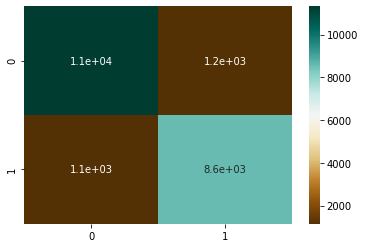

In [27]:
pred = bc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [28]:
print(classification_report(y_car_c_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     12483
           1       0.88      0.88      0.88      9754

    accuracy                           0.90     22237
   macro avg       0.89      0.89      0.89     22237
weighted avg       0.90      0.90      0.90     22237



In [2]:
#build smaller feature set
#read in data set before making dummies
bike_df = pd.read_csv('data/cleaned_data/model_df.csv')
bike_df = bike_df[['car_acc_score', 'bike_acc_score', 'AADT', 'City', 'ROW_Width', 'Surface_Wd', 
                 'Jurisdictn', 'Rt_Sidewlk', 'Lt_Sidewlk', 'Route_Direction', 'Med_Width',
                 'Op_Dir_SL', 'Struct_Cnd', 'Operation', 'Terrain', 'F_Class']]
bike_dum = pd.get_dummies(bike_df, columns=['City', 'Jurisdictn', 'Route_Direction', 'Struct_Cnd',
                                         'Operation', 'Terrain', 'F_Class'])
bike_dum.head()

,car_acc_score,bike_acc_score,AADT,ROW_Width,Surface_Wd,Rt_Sidewlk,Lt_Sidewlk,Med_Width,Op_Dir_SL,City_-1,...,Terrain_1,Terrain_2,Terrain_3,F_Class_-1,F_Class_0,F_Class_1,F_Class_2,F_Class_3,F_Class_5,F_Class_6
0,1,10,1154.0,50.0,28.0,4.0,4.0,0.0,30,0,...,1,0,0,0,1,0,0,0,0,0
1,0,4,1154.0,50.0,28.0,4.0,4.0,0.0,30,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,1154.0,50.0,28.0,4.0,4.0,0.0,30,0,...,1,0,0,0,1,0,0,0,0,0
3,1,10,3598.0,55.0,30.0,5.0,5.0,0.0,99,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,3598.0,55.0,30.0,5.0,5.0,0.0,99,0,...,1,0,0,0,0,0,0,0,0,1


In [6]:
bike_X = bike_dum.drop(columns=['bike_acc_score'])
bike_c_y = bike_dum.bike_acc_score.mask(bike_dum.bike_acc_score > 0, 1)

# do train test split
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

In [7]:
gbc = ensemble.GradientBoostingClassifier(random_state=18)
params = {'n_estimators': [10, 100, 500, 1000],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
          'max_depth' : [2, 3, 5, 10],
          'max_features': ['sqrt', 'log2', None],
          'min_samples_split': [2, 5, 10, 20]}
cv = RandomizedSearchCV(gbc, params)
cv.fit(X_bike_c_train, y_bike_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_bike_c_test, y_bike_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8187255475109052
Tuned Model Parameters: {'n_estimators': 500, 'min_samples_split': 20, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.2}


In [8]:
gbc = ensemble.GradientBoostingClassifier(random_state=18, n_estimators=500, learning_rate=0.2, max_features=None)
params = {'max_depth' : [2, 3, 5, 10],
          'min_samples_split': [2, 5, 10, 20]}
cv = RandomizedSearchCV(gbc, params)
cv.fit(X_bike_c_train, y_bike_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_bike_c_test, y_bike_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8207492017808158
Tuned Model Parameters: {'min_samples_split': 10, 'max_depth': 5}
